# Analysing New South Wales (NSW) Baby Name Trends
## Questions
* How have NSW baby name tastes changed since 1950?
* Which names have remained popular for over 70 years, and how do those names compare to more recent top baby names?

I'll be working with data provided by the NSW Registry of Births, Deaths and Marriages, which lists first names along with the number and sex of babies they were given to in each year.

## Data Source
* Source URL: Data.NSW https://data.nsw.gov.au/data/dataset/popular-baby-names-from-1952
* Date range: 1950-2022
* Collecting methodology: An annual list of top 100 popular baby names in NSW is based on the names registered in the previous calendar year. 

In [52]:
# Export the csv file into a dataframe
import pandas as pd

names = pd.read_csv('popular_baby_names_1952_to_2022-v2.csv')
names.head()

,Rank,Name,Number,Gender,Year
0,1,NOAH,630,Male,2022
1,1,CHARLOTTE,430,Female,2022
2,2,OLIVER,628,Male,2022
3,2,AMELIA,425,Female,2022
4,3,LEO,447,Male,2022


In [53]:
# Inspect the data quality of the dataframe
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14200 entries, 0 to 14199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0    Rank   14200 non-null  int64 
 1   Name    14200 non-null  object
 2   Number  14200 non-null  int64 
 3   Gender  14200 non-null  object
 4   Year    14200 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 554.8+ KB


In [54]:
# Capitalise the first letter of each name
names['Name'] = names['Name'].str.title()
names.head()

,Rank,Name,Number,Gender,Year
0,1,Noah,630,Male,2022
1,1,Charlotte,430,Female,2022
2,2,Oliver,628,Male,2022
3,2,Amelia,425,Female,2022
4,3,Leo,447,Male,2022


**1. Classic Australian Names**

In [30]:
# Filter names that appear in every year
consistent_names = names.groupby(['Name', 'Gender']).filter(lambda x: len(x) == 71)

# Group by name and sum the number of births, and sort by the number of births descendingly
consistent_names.groupby(['Name', 'Gender']).agg({'Number': 'sum'}).sort_values(by='Number', ascending=False)


,,Number
Name,Gender,
Michael,Male,70685
James,Male,45140
Daniel,Male,44412
William,Male,31250
Thomas,Male,28624
Elizabeth,Female,22001
Joseph,Male,14157
Patrick,Male,13494
George,Male,12107


It looks like there are a lot of timeless traditionally male names. There is only one for female, and it is Elizabeth.

**2. Timeless or trendy?**

Let's broaden our understanding of the dataset by looking at all names. We'll attempt to capture the type of popularity that each name in the dataset enjoyed. Was the name classic and popular across many years or trendy, only popular for a few years? Let's find out.

In [42]:
# Create a new condition column based on the number of year the name appears
trends = names.groupby(['Name', 'Gender']).agg({'Number': 'sum', 'Year': 'count'}).reset_index().rename(columns={'Year': 'Year Count'})

def condition(year_count):
    if year_count >= 60:
        return 'Classic'
    elif year_count >= 40:
        return 'Semi-classic'
    elif year_count >= 20:
        return 'Semi-trendy'
    else:
        return 'Trendy'
    
trends['Popularity Type'] = trends['Year Count'].apply(condition)
trends

,Name,Gender,Number,Year Count,Popularity Type
0,Aaliyah,Female,1313,14,Trendy
1,Aaron,Male,13359,48,Semi-classic
2,Abbey,Female,1917,15,Trendy
3,Abby,Female,913,10,Trendy
4,Abigail,Female,3510,21,Semi-trendy
...,...,...,...,...,...
709,Zane,Male,606,6,Trendy
710,Zara,Female,3726,20,Semi-trendy
711,Zayn,Male,196,2,Trendy
712,Zoe,Female,9654,41,Semi-classic


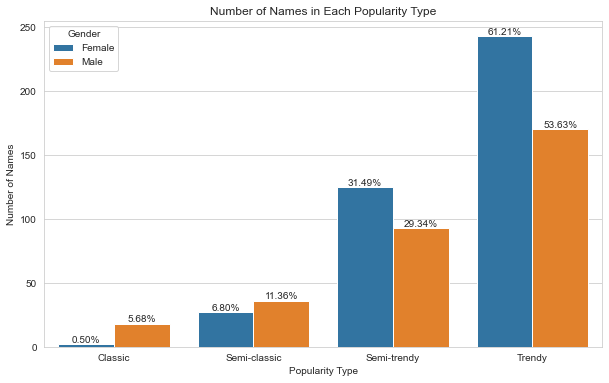

In [74]:
# Create a bar chart group by gender to show the number of names in each popularity type
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))

proportions = trends.groupby('Gender')['Popularity Type'].value_counts(normalize=True)
# Sort proportions dataframe in order 'Classic', 'Semi-classic', 'Semi-trendy', 'Trendy'
proportions = proportions.reindex(['Classic', 'Semi-classic', 'Semi-trendy', 'Trendy'], level=1)

ax = sns.countplot(x='Popularity Type', data=trends, hue='Gender', order=['Classic', 'Semi-classic', 'Semi-trendy', 'Trendy'])

for c in ax.containers:
    labels = [f'{(v*100):.2f}%' for v in proportions.loc[c.get_label()].values]
    ax.bar_label(c, labels=labels, label_type='edge')

plt.title('Number of Names in Each Popularity Type')
plt.xlabel('Popularity Type')
plt.ylabel('Number of Names')
plt.show()